E-commerce is a huge business sector that allows customers to access a variety of goods and services with a few clicks. Many popular shopping platforms such as Amazon or Alibaba process millions of transactions annually. In recent years, due to the corona disease, online shopping has increased dramatically, therefore, the online shopping market has become very competitive and it is important for strong and innovative online shopping platforms.   
One possible way to increase online shopping transactions is to understand and respond to customers' behavior. According to sufficient online shopping data and machine learning techniques, it is possible to determine the purchase intention of website visitors, so in this exercise, we want to use machine learning algorithms in Marketing Analytics, which is one of the topics discussed in recent years. let's get to know each other more.

## Dataset

Before doing anything, we need to get familiar with Dataset. The desired dataset is located in the `customers_intention.csv` file. This dataset contains various information related to customer behavior on online shopping websites, which helps us to perform marketing analysis and understand related KPIs and metrics. This dataset contains feature vectors belonging to 12330 sessions, in the sense that each row shows the behavior of a customer to buy a product and has a total of 10 numerical features and 8 categorical features. 
Use the "Revenue" property as the class label.

in this section, what you have to do is as follows:
 - lead the dataset
 - print information of the dataset
 - plot number of data for each label in `Revenue` column.

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# Load dataset
data = pd.read_csv('Customers_intention.csv')

# shape of the data(number of rows vs number of column)
data.shape

(12330, 18)

In [36]:
# Displaying some rows of the data
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [37]:
# dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [38]:
# description of the data
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [39]:
data['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

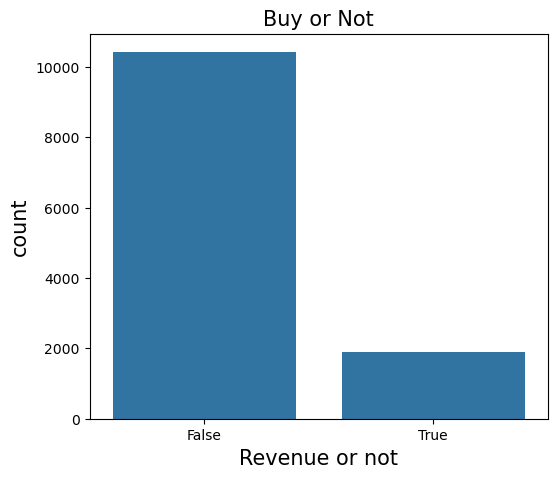

In [40]:
# plot number of data for each class label
plt.rcParams['figure.figsize'] = (13, 5)

plt.subplot(1, 2, 1)
sns.countplot(x ='Revenue', data = data)
plt.title('Buy or Not', fontsize = 15)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

## Data Cleaning

Now, after reading the data, it is time to clean the data. At this stage, we need to do the necessary pre-processing to clean the dataset. Some of the things we suggest you do are as follows:
- Identification of null values
- Handling the null values of each column in an appropriate way
- one-hot encoding of categorical columns. you can use this [link](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/) for one-hot encoding
And any pre-processing you want.

In [41]:
# identify and handle nan values
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [42]:
# categorical encoding and one hot encoding
categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
cat=data.columns[10:]
data[cat]=data[cat].astype('category')
data.describe(include='category')


,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330,12330,12330,12330,12330,12330,12330,12330
unique,10,8,13,9,20,3,2,2
top,May,2,2,1,2,Returning_Visitor,False,False
freq,3364,6601,7961,4780,3913,10551,9462,10422


In [43]:
df_encoded = pd.get_dummies(data, columns=categorical_columns)
df_encoded.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,Revenue_False,Revenue_True
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,False,False,False,False,False,True,True,False,True,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,...,False,False,False,False,False,True,True,False,True,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,...,False,False,False,False,False,True,True,False,True,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,...,False,False,False,False,False,True,True,False,True,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,...,False,False,False,False,False,True,False,True,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,...,False,False,False,False,False,True,True,False,True,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,...,False,False,False,False,False,True,True,False,True,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,...,False,False,False,False,False,True,False,True,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,...,False,False,False,False,False,True,True,False,True,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,...,False,False,False,False,False,True,True,False,True,False


## Train/Test Split
- Divide the data into two parts, train and test. Assign `80%` of the data to the train section.
    - split in a `stratified` fashion. (Hint: you need to change a parameter in the corresponding method)

In [44]:
# import train test split from sklearn
from sklearn.model_selection import train_test_split

In [45]:
# train test split
X = df_encoded.drop('Revenue_True', axis=1)  # Drop one of the one-hot encoded target columns (Revenue_False or Revenue_True)
y = df_encoded['Revenue_True']  # Use the one-hot encoded 'Revenue_True' column as target

# Split the data into training and testing sets in a stratified fashion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


## Classification Using Regression

- Assign +1 to every instance of customer visit that led to a purchase and assign -1 to every visit that did not lead to a purchase.
- Using a regression model (univariate, multivariate, linear, polynomial, etc.), predict whether a cutomer's visit will lead to a purchase or not.
- How do you decide whether a visit will lead to a purchase based on the output of the model which is a real-valued number? 

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [47]:
# Assign +1 to purchases and -1 to non-purchases
df_encoded['Purchase_Label'] = df_encoded['Revenue_True'].apply(lambda x: 1 if x == 1 else -1)

# Define the feature set X and the target variable y
X = df_encoded.drop(['Revenue_True', 'Revenue_False', 'Purchase_Label'], axis=1)
y = df_encoded['Purchase_Label']

# Split the data into training and testing sets in a stratified fashion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [48]:
# Train the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test)

# Assign class labels based on the sign of the predicted value
y_pred_class = [1 if pred >= 0 else -1 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy:.2f}")

# Display the first few predictions
for true, pred, pred_class in zip(y_test[:10], y_pred[:10], y_pred_class[:10]):
    print(f"True: {true}, Predicted: {pred:.2f}, Predicted Class: {pred_class}")


Accuracy: 0.87
True: -1, Predicted: -0.90, Predicted Class: -1
True: -1, Predicted: -0.85, Predicted Class: -1
True: 1, Predicted: 0.84, Predicted Class: 1
True: -1, Predicted: -1.09, Predicted Class: -1
True: -1, Predicted: -0.91, Predicted Class: -1
True: -1, Predicted: -0.97, Predicted Class: -1
True: 1, Predicted: -0.80, Predicted Class: -1
True: -1, Predicted: -0.57, Predicted Class: -1
True: -1, Predicted: -0.74, Predicted Class: -1
True: -1, Predicted: -0.75, Predicted Class: -1


## Dimensionality Reduction
Dimensionality reduction, or dimension reduction, is the transformation of data from a high-dimensional space into a low-dimensional space so that the low-dimensional representation retains some meaningful properties of the original data, ideally close to its intrinsic dimension. Working in high-dimensional spaces can be undesirable for many reasons; raw data are often sparse as a consequence of the curse of dimensionality, and analyzing the data is usually computationally intractable (hard to control or deal with).


in this section you ar goinig to:
- plot datapoints in 2 dimensions using PCA
- Choose the best number of dimensions for PCA by plotting [cumulative explained variance ratio](https://medium.com/@megha.natarajan/understanding-cumulative-explained-variance-in-pca-with-python-653e3592a77c#:~:text=The%20Cumulative%20Explained%20Variance%20plot%20is%20a%20graphical%20representation%20that,the%20variance%20in%20the%20data.)
- Apply pca to the dataset with the number of dimensions you obtained in the previous section

*`don't remember you to standardize data before PCA transformation!`*

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

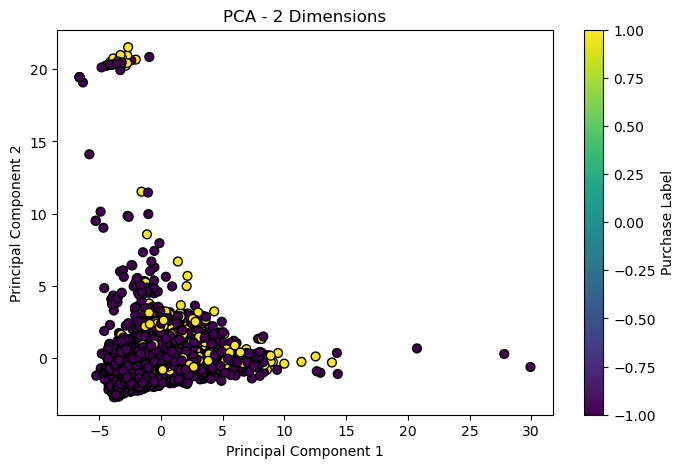

In [50]:
# plot datapoints in 2 dimensions using PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA and reduce to 2 dimensions for plotting
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_scaled)

# Plot the data points in 2 dimensions
plt.figure(figsize=(8, 5))
plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - 2 Dimensions')
plt.colorbar(label='Purchase Label')
plt.show()

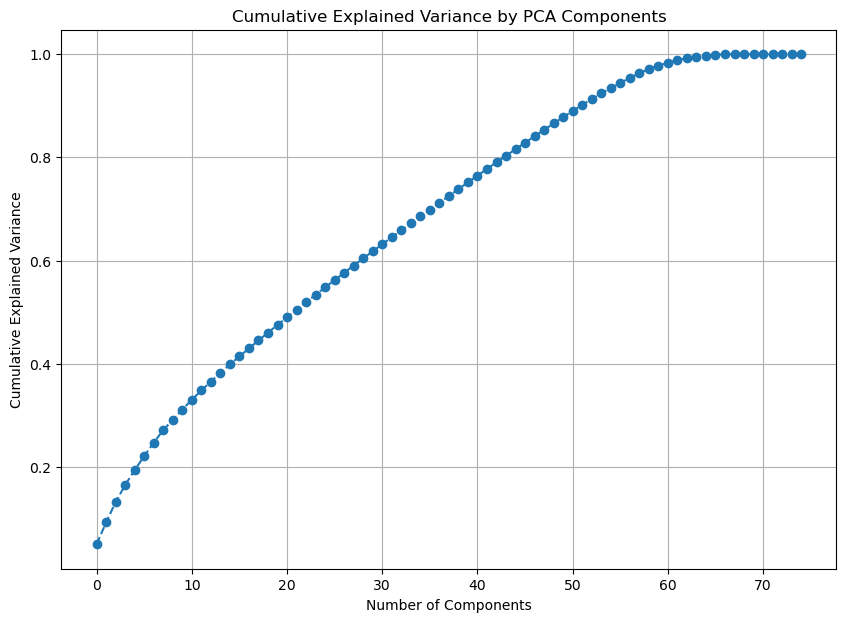

Number of components to retain 90% variance: 52


In [51]:
# Choose the best number of dimensions for PCA
# Apply PCA to find the optimal number of dimensions
pca = PCA()
pca.fit(X_train_scaled)

# Plot cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 7))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid()
plt.show()

# Choose the number of components to retain 95% of the variance
optimal_components = np.argmax(cumulative_explained_variance >= 0.9) + 1
print(f"Number of components to retain 90% variance: {optimal_components}")

In [52]:
# Apply pca
pca_optimal = PCA(n_components=optimal_components)
X_train_pca_optimal = pca_optimal.fit_transform(X_train_scaled)
X_test_pca_optimal = pca_optimal.transform(X_test_scaled)

# Train the regression model on the reduced data
regressor = LinearRegression()
regressor.fit(X_train_pca_optimal, y_train)

# Predict on the test set
y_pred = regressor.predict(X_test_pca_optimal)

# Assign class labels based on the sign of the predicted value
y_pred_class = [1 if pred >= 0 else -1 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy:.2f}")

# Display the first few predictions
for true, pred, pred_class in zip(y_test[:10], y_pred[:10], y_pred_class[:10]):
    print(f"True: {true}, Predicted: {pred:.2f}, Predicted Class: {pred_class}")

Accuracy: 0.87
True: -1, Predicted: -1.20, Predicted Class: -1
True: -1, Predicted: -0.83, Predicted Class: -1
True: 1, Predicted: 0.75, Predicted Class: 1
True: -1, Predicted: -0.99, Predicted Class: -1
True: -1, Predicted: -0.83, Predicted Class: -1
True: -1, Predicted: -0.91, Predicted Class: -1
True: 1, Predicted: -0.68, Predicted Class: -1
True: -1, Predicted: -0.43, Predicted Class: -1
True: -1, Predicted: -0.73, Predicted Class: -1
True: -1, Predicted: -0.58, Predicted Class: -1


## Over-Sampling

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

in this section you are going to use `SMOTE` method for over-sampling data to get equal number of data for each data. After applying SMOTE plot number of data for each class again to see the diffrence.
- [over-smapling](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)

In [53]:
# import  imblearn library for SMOTE
from imblearn.over_sampling import SMOTE

In [54]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca_optimal, y_train)
X_test_resampled, y_test_resampled = smote.fit_resample(X_test_pca_optimal, y_test)

# Train the regression model on the resampled data
regressor = LinearRegression()
regressor.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = regressor.predict(X_test_resampled)

# Assign class labels based on the sign of the predicted value
y_pred_class = [1 if pred >= 0 else -1 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test_resampled, y_pred_class)
print(f"Accuracy: {accuracy:.2f}")

# Display the first few predictions
for true, pred, pred_class in zip(y_test_resampled[:10], y_pred[:10], y_pred_class[:10]):
    print(f"True: {true}, Predicted: {pred:.2f}, Predicted Class: {pred_class}")

Accuracy: 0.79
True: -1, Predicted: -0.82, Predicted Class: -1
True: -1, Predicted: -0.34, Predicted Class: -1
True: 1, Predicted: 1.09, Predicted Class: 1
True: -1, Predicted: -0.68, Predicted Class: -1
True: -1, Predicted: -0.65, Predicted Class: -1
True: -1, Predicted: -0.57, Predicted Class: -1
True: 1, Predicted: -0.36, Predicted Class: -1
True: -1, Predicted: 0.23, Predicted Class: 1
True: -1, Predicted: -0.14, Predicted Class: -1
True: -1, Predicted: -0.20, Predicted Class: -1


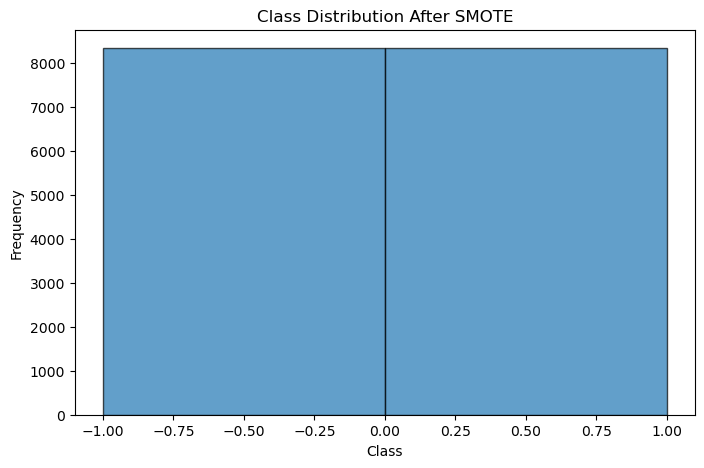

In [55]:
# plot number of data for each class
plt.figure(figsize=(8, 5))
plt.hist(y_train_resampled, bins=2, edgecolor='k', alpha=0.7)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution After SMOTE')
plt.show()

## Training Classifiers

Classification is the process of predicting the class of given data points. Classes are sometimes called as targets/ labels or categories. Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y).

in this section you are going to train several cllassifiers like:
- `SVM`
- `KNN`
- `Logistic Regression`
- `Decision Tree`

Use the dimensionally reduced `train` data to train the specified classifiers. 
- for each classifier use `gridsearch` to find best hyper parameters.
    - use `cross validation` for grid search
- after finding best parameters for each classifier, use them to train a classifier with founded parameters.
    - again train your best classifiers with `cross valdiation`
- use a bar plot to show each classifier's `accuracy`, `precision`, `f1` and `roc_auc`.

In [56]:
# Import Necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, make_scorer, classification_report

In [57]:
# Train classifiers 

# Define Classifiers and Hyperparameters for Grid Search
classifiers = {
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier()
}

params = {
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['saga']
    },
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
}

# Perform Grid Search with Cross-Validation
best_classifiers = {}
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

for clf_name, clf in classifiers.items():
    print(f"Training {clf_name}...")
    grid_search = GridSearchCV(clf, params[clf_name], cv=5, scoring=scoring, refit='f1', n_jobs=-1)
    grid_search.fit(X_train_resampled, y_train_resampled)
    best_classifiers[clf_name] = grid_search.best_estimator_

    print(f"Best parameters for {clf_name}: {grid_search.best_params_}")
    print(f"Best cross-validated scores for {clf_name}: {grid_search.best_score_:.2f}\n")

Training SVM...
Best parameters for SVM: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Best cross-validated scores for SVM: 0.93

Training KNN...
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validated scores for KNN: 0.90

Training Logistic Regression...


/home/mahdi/miniconda3/envs/test/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mahdi/miniconda3/envs/test/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mahdi/miniconda3/envs/test/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mahdi/miniconda3/envs/test/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mahdi/miniconda3/envs/test/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/mahdi/min

Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validated scores for Logistic Regression: 0.84

Training Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 2}
Best cross-validated scores for Decision Tree: 0.86



`SVM`
- Best parameters for SVM: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
- Best cross-validated accuracy for SVM: 0.93

`KNN`
- Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
- Best cross-validated accuracy for KNN: 0.90

`Logistic Regression`
- Best parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
- Best cross-validated accuracy for Logistic Regression: 0.84

`Decision Tree`
- Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 2}
- Best cross-validated accuracy for Decision Tree: 0.86

In [61]:
# Evaluate Classifiers with Cross-Validation
results = {
    'Classifier': [],
    'Accuracy': [],
    'Precision': [],
    'F1 Score': [],
    'ROC AUC': []
}

for clf_name, clf in best_classifiers.items():
    print(f"Evaluating {clf_name}...")
    y_pred = clf.predict(X_test_pca_optimal)
    y_proba = clf.predict_proba(X_test_pca_optimal)[:, 1] if hasattr(clf, 'predict_proba') else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    results['Classifier'].append(clf_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['F1 Score'].append(f1)
    results['ROC AUC'].append(roc_auc)

    roc_auc_str = f"{roc_auc:.2f}" if roc_auc is not None else "N/A"
    print(f"{clf_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, F1 Score: {f1:.2f}, ROC AUC: {roc_auc_str}\n")
    print(classification_report(y_test, y_pred))



Evaluating SVM...
SVM - Accuracy: 0.84, Precision: 0.49, F1 Score: 0.51, ROC AUC: 0.81

              precision    recall  f1-score   support

          -1       0.91      0.90      0.91      2084
           1       0.49      0.52      0.51       382

    accuracy                           0.84      2466
   macro avg       0.70      0.71      0.71      2466
weighted avg       0.85      0.84      0.84      2466

Evaluating KNN...
KNN - Accuracy: 0.77, Precision: 0.31, F1 Score: 0.35, ROC AUC: 0.67

              precision    recall  f1-score   support

          -1       0.89      0.83      0.86      2084
           1       0.31      0.41      0.35       382

    accuracy                           0.77      2466
   macro avg       0.60      0.62      0.61      2466
weighted avg       0.80      0.77      0.78      2466

Evaluating Logistic Regression...
Logistic Regression - Accuracy: 0.84, Precision: 0.48, F1 Score: 0.58, ROC AUC: 0.88

              precision    recall  f1-score   supp

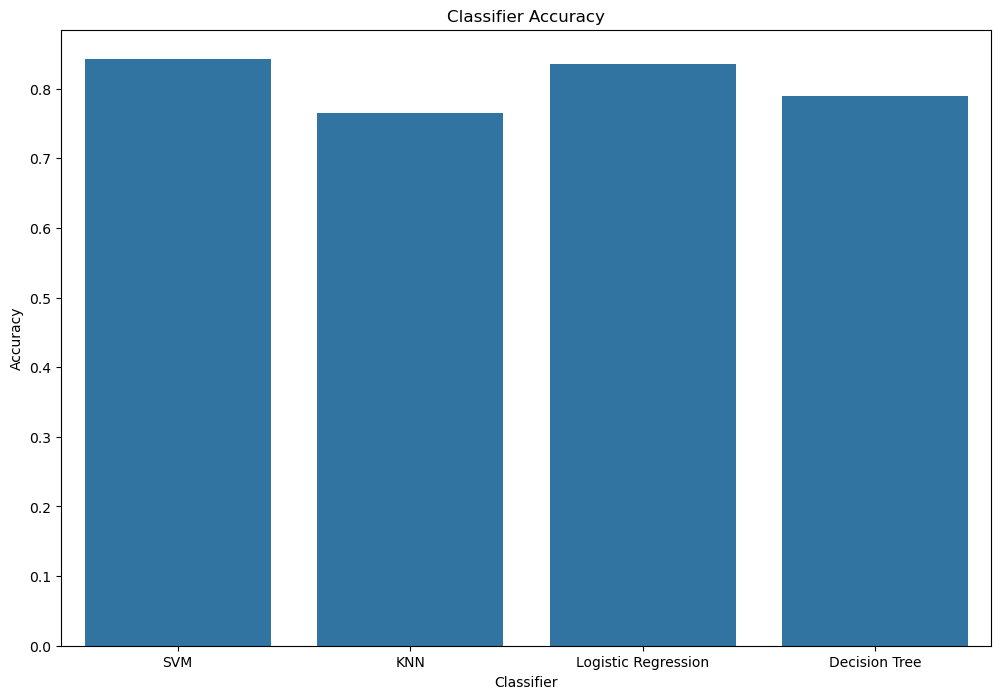

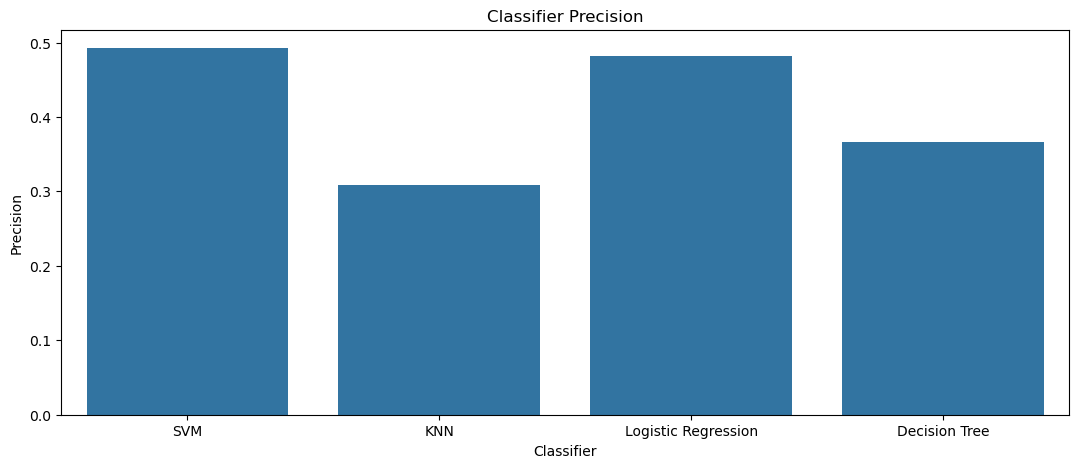

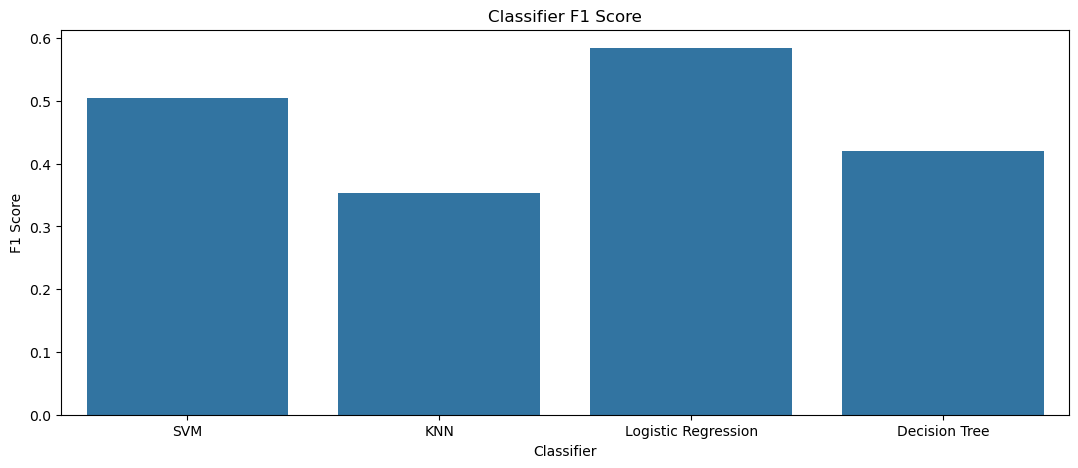

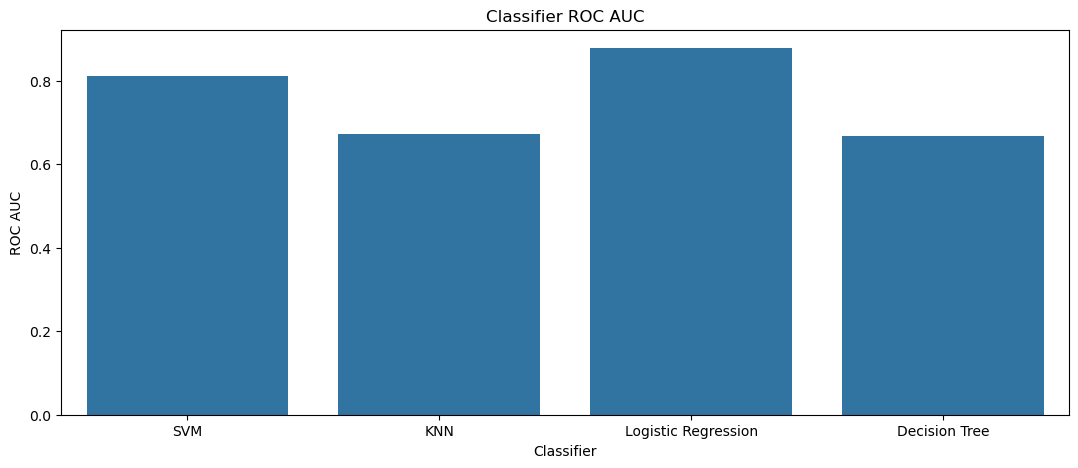

In [62]:
# bar plot for scores
results_df = pd.DataFrame(results)

plt.figure(figsize=(12, 8))
metrics = ['Accuracy', 'Precision', 'F1 Score', 'ROC AUC']
for metric in metrics:
    sns.barplot(x='Classifier', y=metric, data=results_df)
    plt.title(f'Classifier {metric}')
    plt.ylabel(metric)
    plt.xlabel('Classifier')
    plt.show()

## Test your Model and Report results

choose the best model from last section based on the evalutiona metrics and bar plots and after that train the best classifier based on train data and test it's performance on test data. With this, we can see how good the model is on unseen data.

- print `classification report` and plot `confusion matrix` based on your model's predictions and the real labels.

In [63]:
# import necessary Libraries
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

Classification Report:
              precision    recall  f1-score   support

          -1       0.91      0.90      0.91      2084
           1       0.49      0.52      0.51       382

    accuracy                           0.84      2466
   macro avg       0.70      0.71      0.71      2466
weighted avg       0.85      0.84      0.84      2466



<Figure size 800x600 with 0 Axes>

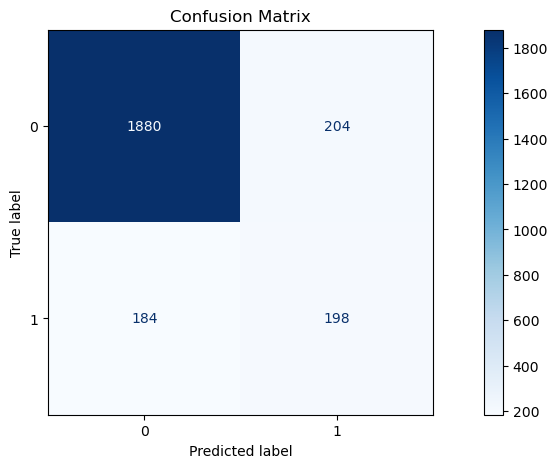

In [64]:
# train the best model again and evaluate it on test data
# Retrieve the best SVM model from the previous section
best_model = best_classifiers['SVM']

# Train the best model on the entire training data (resampled)
best_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_test_pred = best_model.predict(X_test_pca_optimal)
y_test_proba = best_model.predict_proba(X_test_pca_optimal)[:, 1] if hasattr(best_model, 'predict_proba') else None

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [65]:
# classification report
# Print classification report and plot confusion matrix (as shown above)
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

          -1       0.91      0.90      0.91      2084
           1       0.49      0.52      0.51       382

    accuracy                           0.84      2466
   macro avg       0.70      0.71      0.71      2466
weighted avg       0.85      0.84      0.84      2466



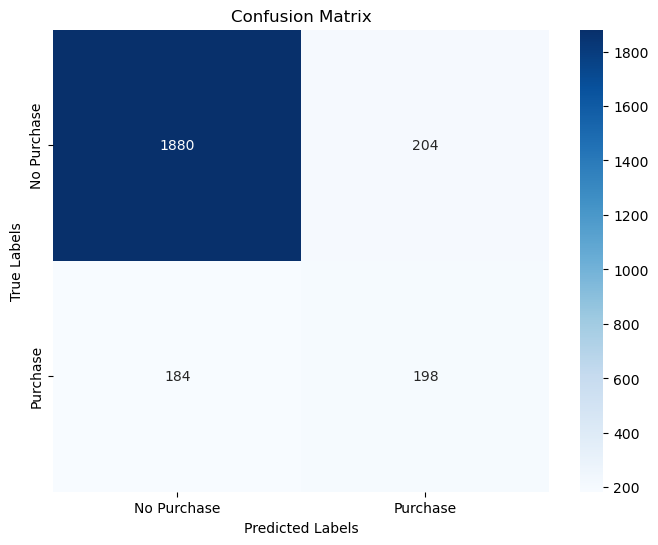

In [66]:
# confusion matrix
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Clustering

When analyzing customer behavior, clustering algorithms can help identify groups of customers with similar characteristics. Two popular clustering methods are K-means and DBSCAN.  

In [67]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

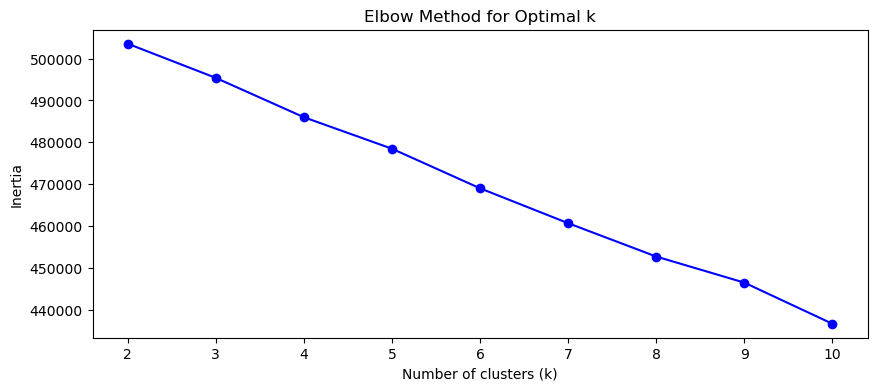

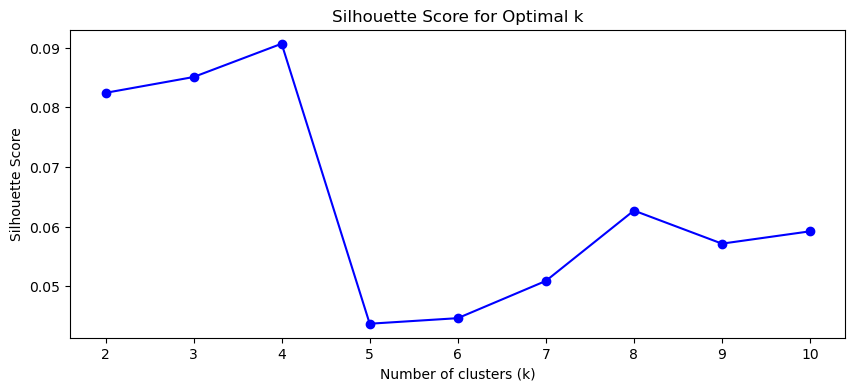

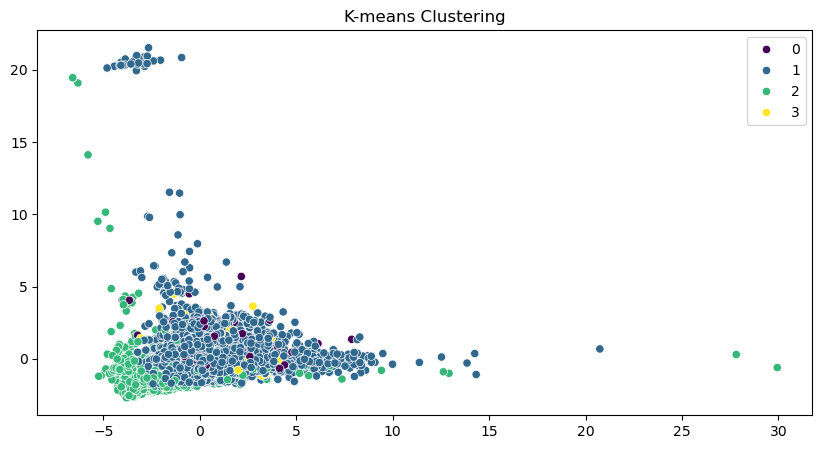

In [71]:
#Kmeans (Use a method for finding optimal number of clusters)
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_pca_optimal)  # Use PCA-transformed data

# Elbow method to find the optimal number of clusters
inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot the elbow graph
plt.figure(figsize=(10, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Plot silhouette scores
plt.figure(figsize=(10, 4))
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

# Choose the optimal number of clusters based on the Elbow and Silhouette methods
optimal_k = 4  # Example, choose based on the previous plots

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_train_pca_optimal[:, 0], y=X_train_pca_optimal[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('K-means Clustering')
plt.show()



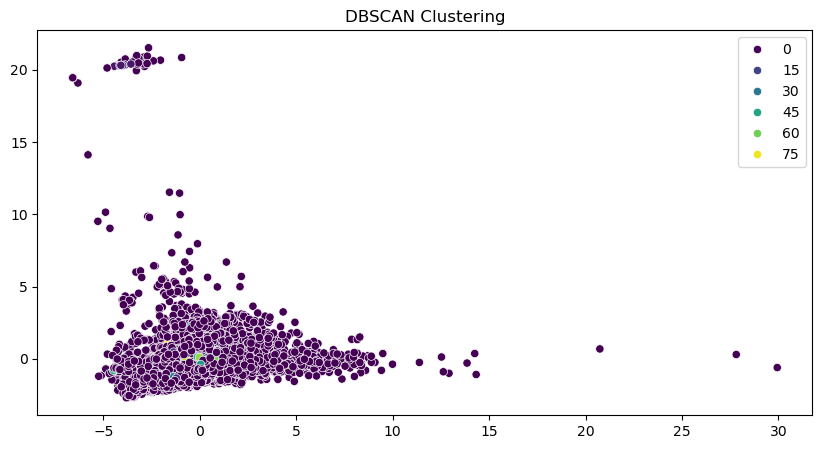

In [72]:
#DBSCAN
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # These parameters need to be tuned
dbscan_labels = dbscan.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x=X_train_pca_optimal[:, 0], y=X_train_pca_optimal[:, 1], hue=dbscan_labels, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()
